<a href="https://colab.research.google.com/github/Godwin-Anku/Simple-Neural-Network---Regression-Analysis/blob/main/Simple_Neural_Network_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

In [ ]:
SEED_VALUE = 42
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
print(f'Training data dimesions: {X_train.shape}')
print('\n')
print(f'Target training data dimensions: {y_train.shape}')
print('\n')
print(f'Testing data dimension: {X_test.shape}')
print('\n')
print(f'Target test data dimensions: {y_test.shape}')

Training data dimesions: (404, 13)


Target training data dimensions: (404,)


Testing data dimension: (102, 13)


Target test data dimensions: (102,)


In [ ]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
y_train[0]

15.2

In [ ]:
X_test[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [ ]:
y_test[0]

7.2

In [ ]:
boston_feature = {'Average Number of Rooms': 5}
X_train_1D = X_train[:, boston_feature['Average Number of Rooms']]
X_train_1D

array([6.142, 7.61 , 4.97 , 6.037, 6.376, 5.708, 5.536, 5.468, 5.628,
       5.019, 6.404, 4.628, 5.572, 6.251, 5.613, 5.957, 7.016, 6.345,
       6.162, 6.727, 6.202, 6.595, 7.135, 6.575, 5.895, 6.794, 6.012,
       7.185, 5.813, 5.569, 6.315, 6.297, 6.301, 5.935, 7.024, 6.415,
       5.599, 5.701, 6.041, 6.279, 5.454, 6.211, 6.316, 6.411, 5.887,
       5.924, 5.822, 6.674, 6.842, 5.713, 5.968, 6.461, 7.358, 6.565,
       5.88 , 5.87 , 6.348, 6.193, 6.854, 6.546, 6.004, 6.538, 6.185,
       5.836, 6.525, 6.436, 5.757, 5.818, 5.852, 5.404, 5.682, 6.629,
       7.178, 5.914, 6.096, 5.631, 5.896, 5.637, 5.966, 5.403, 6.678,
       7.47 , 5.456, 6.453, 6.372, 6.31 , 6.405, 7.853, 4.926, 6.103,
       6.75 , 8.034, 6.009, 7.765, 8.069, 6.358, 6.975, 6.015, 6.8  ,
       6.43 , 7.645, 8.337, 6.113, 6.77 , 5.757, 6.487, 6.162, 6.069,
       5.565, 5.96 , 6.229, 7.929, 6.715, 5.39 , 6.383, 7.147, 6.006,
       6.004, 5.928, 5.936, 6.315, 5.727, 6.152, 7.454, 6.968, 5.95 ,
       6.232, 6.951,

In [ ]:
X_test_1D = X_test[:, boston_feature['Average Number of Rooms']]
X_test_1D

array([6.434, 5.913, 5.985, 6.25 , 6.121, 5.926, 6.874, 6.167, 5.961,
       6.437, 6.405, 6.072, 6.151, 7.831, 5.648, 6.108, 6.417, 6.144,
       6.114, 6.127, 5.304, 5.837, 5.841, 5.605, 5.876, 6.242, 6.879,
       6.728, 6.38 , 5.878, 6.176, 6.833, 6.826, 6.245, 5.713, 5.   ,
       5.597, 5.877, 5.983, 6.635, 7.104, 6.625, 6.185, 7.686, 6.563,
       6.153, 6.616, 5.782, 6.513, 6.182, 7.249, 5.79 , 5.036, 5.813,
       7.185, 6.63 , 6.343, 8.297, 6.758, 6.421, 6.98 , 6.471, 6.852,
       6.019, 6.376, 6.108, 6.417, 6.209, 5.093, 5.987, 6.395, 6.957,
       6.229, 5.414, 6.495, 6.009, 5.885, 6.375, 6.968, 4.88 , 5.981,
       7.52 , 5.593, 6.485, 5.705, 6.172, 6.229, 5.951, 6.593, 7.061,
       6.03 , 5.884, 6.897, 8.259, 6.812, 6.122, 7.333, 8.78 , 6.273,
       7.802, 6.951, 6.101])

In [ ]:
print(f'X-Train 1D dimension: {X_train_1D.shape}')
print(f'X-Test 1D dimension: {X_test_1D.shape}')

X-Train 1D dimension: (404,)
X-Test 1D dimension: (102,)


In [ ]:
def plot_initial_analysis(xdata, ydata, color, title, legend):
  plt.figure(figsize = (15, 6))
  plt.scatter(xdata, ydata, color = color, alpha = 0.7)
  plt.grid(True)
  plt.xlabel('Average Number of Rooms')
  plt.ylabel('Median Price [$K]')
  plt.title(title)
  plt.legend(legend)
  plt.show()

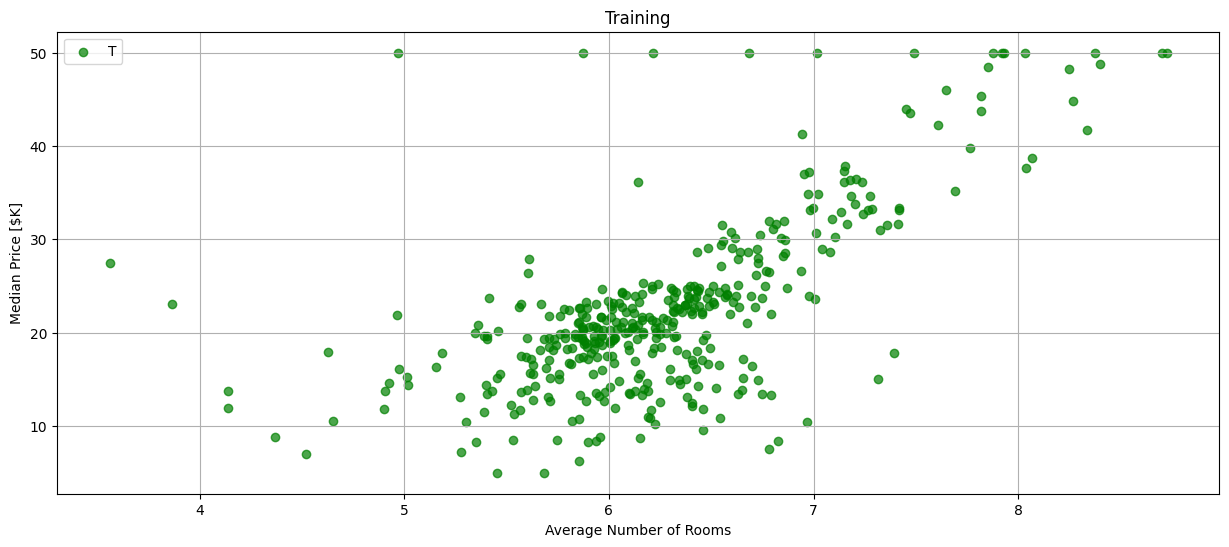

In [ ]:
plot_initial_analysis(xdata = X_train_1D, ydata = y_train, color = 'g', title = 'Training', legend = 'Training Data')

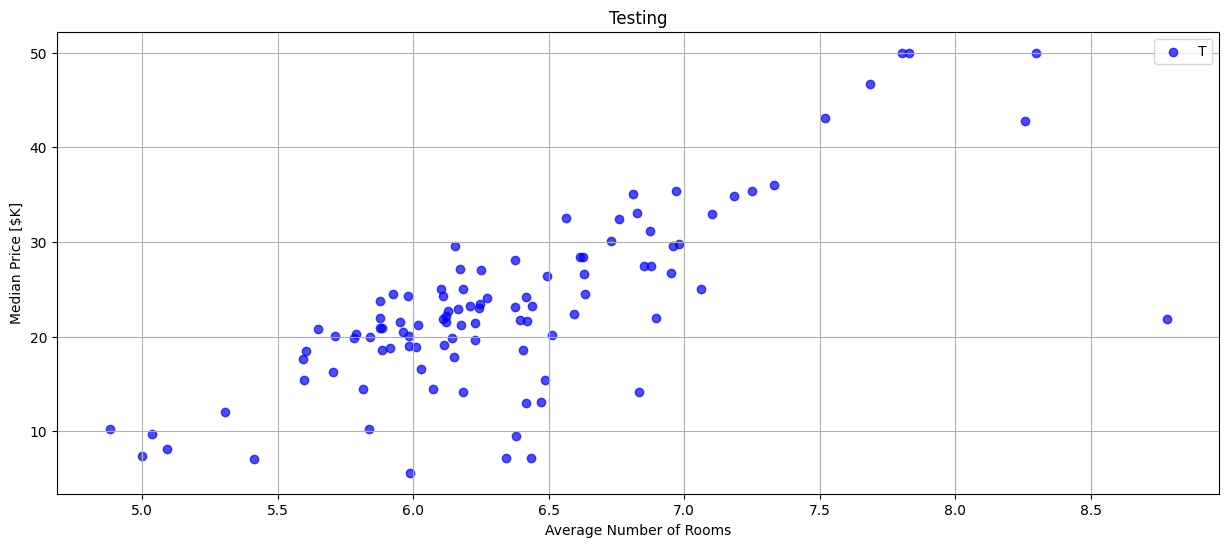

In [ ]:
plot_initial_analysis(X_test_1D, y_test, 'b', 'Testing', 'Testing Data')

In [ ]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (1, )))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.005), loss = 'mae')

In [ ]:
history = model.fit(X_train_1D, y_train, batch_size = 16, epochs = 201, validation_split = 0.3)

Epoch 1/201
18/18 [==============================] - 0s 10ms/step - loss: 15.1941 - val_loss: 16.1388
Epoch 2/201
18/18 [==============================] - 0s 4ms/step - loss: 14.4586 - val_loss: 15.4754
Epoch 3/201
18/18 [==============================] - 0s 3ms/step - loss: 13.8143 - val_loss: 14.8348
Epoch 4/201
18/18 [==============================] - 0s 4ms/step - loss: 13.1833 - val_loss: 14.2126
Epoch 5/201
18/18 [==============================] - 0s 4ms/step - loss: 12.5665 - val_loss: 13.6106
Epoch 6/201
18/18 [==============================] - 0s 3ms/step - loss: 11.9656 - val_loss: 13.0246
Epoch 7/201
18/18 [==============================] - 0s 3ms/step - loss: 11.3749 - val_loss: 12.4375
Epoch 8/201
18/18 [==============================] - 0s 4ms/step - loss: 10.7901 - val_loss: 11.8643
Epoch 9/201
18/18 [==============================] - 0s 4ms/step - loss: 10.2202 - val_loss: 11.3137
Epoch 10/201
18/18 [==============================] - 0s 4ms/step - loss: 9.6638 - val_los

In [ ]:
history.history['loss']

[15.194083213806152,
 14.458562850952148,
 13.814325332641602,
 13.183269500732422,
 12.566498756408691,
 11.965590476989746,
 11.37486743927002,
 10.79011344909668,
 10.220245361328125,
 9.663817405700684,
 9.148374557495117,
 8.6726655960083,
 8.236844062805176,
 7.83296537399292,
 7.456460952758789,
 7.117091178894043,
 6.8000617027282715,
 6.500908374786377,
 6.255352973937988,
 6.016359329223633,
 5.804228782653809,
 5.638673782348633,
 5.516348838806152,
 5.427470684051514,
 5.370480060577393,
 5.327888011932373,
 5.3058762550354,
 5.298290729522705,
 5.294607639312744,
 5.298048973083496,
 5.293309211730957,
 5.293933391571045,
 5.2929205894470215,
 5.294073104858398,
 5.291191101074219,
 5.292418479919434,
 5.291731834411621,
 5.289083003997803,
 5.289351463317871,
 5.291616439819336,
 5.287761211395264,
 5.288553714752197,
 5.289865493774414,
 5.288691520690918,
 5.288701057434082,
 5.286777496337891,
 5.284755229949951,
 5.2875847816467285,
 5.287373065948486,
 5.287019252777

In [ ]:
history.history['val_loss']

[16.13880729675293,
 15.475430488586426,
 14.834800720214844,
 14.212597846984863,
 13.610638618469238,
 13.024624824523926,
 12.437545776367188,
 11.86426067352295,
 11.313699722290039,
 10.775412559509277,
 10.260144233703613,
 9.753188133239746,
 9.282088279724121,
 8.829621315002441,
 8.410787582397461,
 8.033997535705566,
 7.637988567352295,
 7.281804084777832,
 6.978560447692871,
 6.710264205932617,
 6.481461048126221,
 6.311437606811523,
 6.171146869659424,
 6.100162029266357,
 6.045719146728516,
 6.026456356048584,
 6.017916202545166,
 6.0160603523254395,
 6.015289306640625,
 6.0146989822387695,
 6.014068603515625,
 6.01347017288208,
 6.012779235839844,
 6.012123107910156,
 6.011440277099609,
 6.0107197761535645,
 6.010051250457764,
 6.009378433227539,
 6.008512496948242,
 6.007718563079834,
 6.006898880004883,
 6.006178855895996,
 6.005506992340088,
 6.004912853240967,
 6.004273414611816,
 6.003603458404541,
 6.002804756164551,
 6.002137660980225,
 6.001543045043945,
 6.001007

In [ ]:
def plot_loss(loss_data1, loss_data2):
  plt.figure(figsize = (12, 6))
  plt.plot(loss_data1, color = 'g', label = 'Training Loss')
  plt.plot(loss_data2, color = 'b', label = 'Validation Loss')
  plt.legend()
  plt.xlim(0, len(history.history['loss']))
  plt.ylim(0, max(history.history['val_loss']))
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.show()

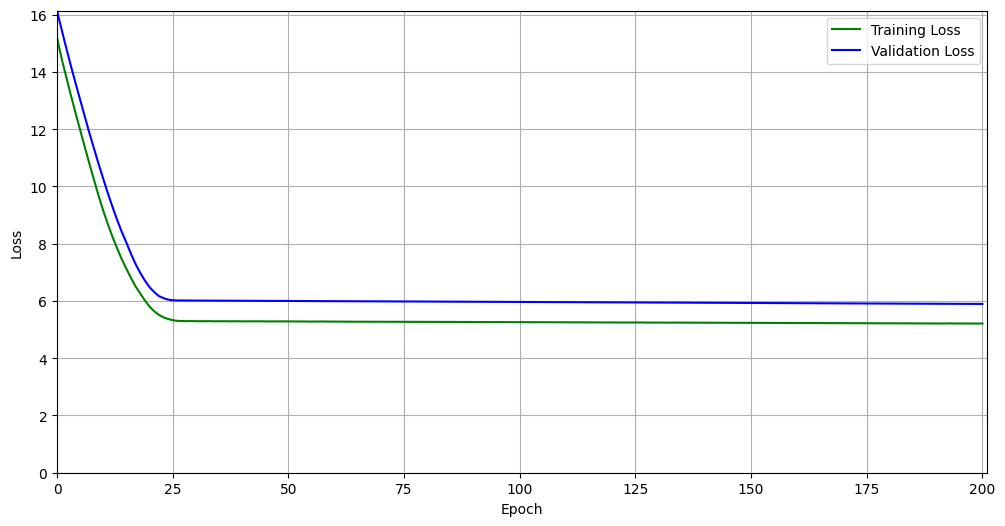

In [ ]:
plot_loss(history.history['loss'], history.history['val_loss'])

In [ ]:
y_predict = model.predict(X_test_1D)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_predict

array([[22.337004],
       [20.526281],
       [20.776514],
       [21.697515],
       [21.249178],
       [20.571463],
       [23.866213],
       [21.40905 ],
       [20.693104],
       [22.34743 ],
       [22.236216],
       [21.07888 ],
       [21.353443],
       [27.192244],
       [19.605278],
       [21.203997],
       [22.27792 ],
       [21.329115],
       [21.22485 ],
       [21.270031],
       [18.409714],
       [20.262144],
       [20.276047],
       [19.455833],
       [20.397688],
       [21.669712],
       [23.88359 ],
       [23.358795],
       [22.149328],
       [20.404638],
       [21.44033 ],
       [23.723719],
       [23.69939 ],
       [21.680138],
       [19.831184],
       [17.35317 ],
       [19.42803 ],
       [20.401163],
       [20.769564],
       [23.035576],
       [24.665573],
       [23.00082 ],
       [21.47161 ],
       [26.6883  ],
       [22.785341],
       [21.360394],
       [22.969542],
       [20.070993],
       [22.611567],
       [21.461184],


In [ ]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [ ]:
test_rooms = [i for i in range(1, 50)]
print(test_rooms)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
predictions = model.predict(test_rooms)
predictions

2/2 [==============================] - 0s 4ms/step


array([[  3.4512632],
       [  6.92674  ],
       [ 10.402216 ],
       [ 13.877693 ],
       [ 17.35317  ],
       [ 20.828646 ],
       [ 24.304123 ],
       [ 27.7796   ],
       [ 31.255077 ],
       [ 34.730556 ],
       [ 38.20603  ],
       [ 41.681507 ],
       [ 45.156986 ],
       [ 48.63246  ],
       [ 52.10794  ],
       [ 55.583416 ],
       [ 59.05889  ],
       [ 62.53437  ],
       [ 66.00984  ],
       [ 69.48532  ],
       [ 72.96079  ],
       [ 76.43627  ],
       [ 79.91175  ],
       [ 83.38722  ],
       [ 86.8627   ],
       [ 90.33818  ],
       [ 93.81366  ],
       [ 97.28913  ],
       [100.76461  ],
       [104.24009  ],
       [107.71556  ],
       [111.19104  ],
       [114.66652  ],
       [118.14199  ],
       [121.61747  ],
       [125.09295  ],
       [128.56842  ],
       [132.0439   ],
       [135.51938  ],
       [138.99486  ],
       [142.47034  ],
       [145.9458   ],
       [149.42128  ],
       [152.89676  ],
       [156.37224  ],
       [15

In [ ]:
for idx in range(len(test_rooms)):
  print(f'Predicted Price of {test_rooms[idx]} rooms: ${int(predictions[idx])}K')

Predicted Price of 1 rooms: $3K
Predicted Price of 2 rooms: $6K
Predicted Price of 3 rooms: $10K
Predicted Price of 4 rooms: $13K
Predicted Price of 5 rooms: $17K
Predicted Price of 6 rooms: $20K
Predicted Price of 7 rooms: $24K
Predicted Price of 8 rooms: $27K
Predicted Price of 9 rooms: $31K
Predicted Price of 10 rooms: $34K
Predicted Price of 11 rooms: $38K
Predicted Price of 12 rooms: $41K
Predicted Price of 13 rooms: $45K
Predicted Price of 14 rooms: $48K
Predicted Price of 15 rooms: $52K
Predicted Price of 16 rooms: $55K
Predicted Price of 17 rooms: $59K
Predicted Price of 18 rooms: $62K
Predicted Price of 19 rooms: $66K
Predicted Price of 20 rooms: $69K
Predicted Price of 21 rooms: $72K
Predicted Price of 22 rooms: $76K
Predicted Price of 23 rooms: $79K
Predicted Price of 24 rooms: $83K
Predicted Price of 25 rooms: $86K
Predicted Price of 26 rooms: $90K
Predicted Price of 27 rooms: $93K
Predicted Price of 28 rooms: $97K
Predicted Price of 29 rooms: $100K
Predicted Price of 30 ro

In [ ]:
xx_p = np.linspace(3, 9, 10)
xx_p

array([3.        , 3.66666667, 4.33333333, 5.        , 5.66666667,
       6.33333333, 7.        , 7.66666667, 8.33333333, 9.        ])

In [ ]:
yy_predict = model.predict(xx_p)
yy_predict

1/1 [==============================] - 0s 29ms/step


array([[10.402216],
       [12.719201],
       [15.036186],
       [17.35317 ],
       [19.670155],
       [21.987139],
       [24.304123],
       [26.621107],
       [28.938091],
       [31.255077]], dtype=float32)

In [ ]:
def plot_test():
  plt.figure(figsize = (15, 6))
  plt.plot(xx_p, yy_predict, color = 'k', label = 'Model Prediction')
  plt.scatter(X_test_1D, y_predict, color = 'r',label = 'Predicted Test Data', alpha = 0.7)
  plt.scatter(X_test_1D, y_test, color = 'b',label = 'Ground Truth Data', alpha = 0.7)
  plt.xlabel('Available Number of Rooms')
  plt.ylabel('Median Price [$K]')
  plt.legend()
  plt.grid(True)
  plt.show()

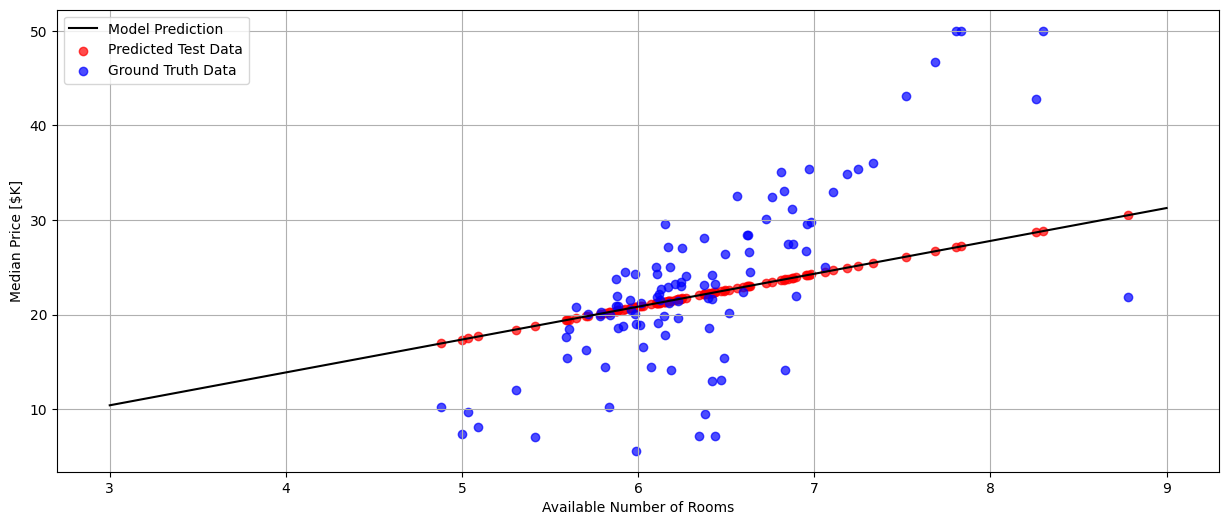

In [ ]:
plot_test()